#Model Interpretability

## About Dataset

This dataset contains about 10 years of daily weather observations from numerous Australian weather stations.

**Taget Variable:**<br>
RainTomorrow - The amount of next day rain in mm. Used to

*   RainTomorrow - The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk"

**Independent Variables:**<br>
* Date - Date of observation<br>
* Location - The common name of the location of the weather station<br>
* MinTemp - The minimum temperature in degrees celsius<br>
* MaxTemp - The maximum temperature in degrees celsius<br>
* Rainfall - The amount of rainfall recorded for the day in mm<br>
* Evaporation - The so-called Class A pan evaporation (mm) in the 24 hours to 9am<br>
* Sunshine - The number of hours of bright sunshine in the day.<br>
* WindGustDir - The direction of the strongest wind gust in the 24 hours to midnight<br>
* WindGustSpeed - The speed (km/h) of the strongest wind gust in the 24 hours to midnight<br>
* WindDir9am - Direction of the wind at 9am<br>
* WindDir3pm - Direction of the wind at 3pm<br>
* WindSpeed9am - Wind speed (km/hr) averaged over 10 minutes prior to 9am<br>
* WindSpeed3pm - Wind speed (km/hr) averaged over 10 minutes prior to 3pm<br>
* Humidity9am - Humidity (percent) at 9am<br>
* Humidity3pm - Humidity (percent) at 3pm<br>
* Pressure9am - Atmospheric pressure (hpa) reduced to mean sea level at 9am<br>
* Pressure3pm - Atmospheric pressure (hpa) reduced to mean sea level at 3pm<br>
* Cloud9am - Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many <br>
* Cloud3pm - Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values<br>
* Temp9am - Temperature (degrees C) at 9am<br>
* Temp3pm - Temperature (degrees C) at 3pm<br>
* RainToday - Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0<br>

[Link to Kaggle Dataset](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/discussion)

## Aim of Assignment

Interpret your models.

1. Fit a linear model and interpret the regression coefficients

2. Fit a tree-based model and interpret the nodes

3.  Use auto ml to find the best model

4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.

In [47]:
!pip install eli5
!pip install -q kaggle

!pip install shap
!pip install lime

!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [48]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.gbm import H2OGradientBoostingEstimator

import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE # Recursive Feature Selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os


import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import skew

from matplotlib.pyplot import figure
from sklearn.tree import export_graphviz
from graphviz import Source
import pydot
import matplotlib.image as mpimg

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

In [49]:
min_mem_size=6
run_time=240
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))

In [50]:
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:55466..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp7mhpcb66
  JVM stdout: /tmp/tmp7mhpcb66/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp7mhpcb66/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:55466
Connecting to H2O server at http://127.0.0.1:55466 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_n5kar0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [51]:
local_path = 'https://raw.githubusercontent.com/pawarsakshee/DSEM/main/weatherAUS.csv'

In [52]:
df = pd.read_csv(local_path)
df=df.dropna()

df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


In [53]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [54]:
# Convert Date object to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [55]:
# Split Date to 'Year', 'Month' & 'Day'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [56]:
# Drop 'Date' from df
data = df.drop('Date', axis=1, inplace=True)

data = df.dropna(axis=0, how='any', subset=["RainTomorrow"])

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
6049,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,1004.4,2.0,5.0,26.6,33.4,No,No,2009,1,1
6050,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,1012.1,1.0,1.0,20.3,27.0,No,No,2009,1,2
6052,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,1009.2,1.0,6.0,28.7,34.9,No,No,2009,1,4
6053,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,1009.1,1.0,5.0,29.1,35.6,No,No,2009,1,5
6054,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,1007.4,1.0,6.0,33.6,37.6,No,No,2009,1,6


In [57]:
# cat_features is a list of column names representing categorical features in a dataset
cat_features = ['Year', 'Month', 'Day', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday']

print(data.shape)

(56420, 25)


In [58]:
lencoders = {}
features = ['Year', 'Month', 'Day', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow']
for col in data[features].columns:
    lencoders[col] = LabelEncoder()
    data[col] = lencoders[col].fit_transform(data[col])

In [59]:
encoded_data = data.copy()
encoded_data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
6049,4,17.9,35.2,0.0,12.0,12.3,11,48.0,1,12,...,1004.4,2.0,5.0,26.6,33.4,0,0,2,0,0
6050,4,18.4,28.9,0.0,14.8,13.0,8,37.0,10,10,...,1012.1,1.0,1.0,20.3,27.0,0,0,2,0,1
6052,4,19.4,37.6,0.0,10.8,10.6,5,46.0,5,6,...,1009.2,1.0,6.0,28.7,34.9,0,0,2,0,3
6053,4,21.9,38.4,0.0,11.4,12.2,14,31.0,14,15,...,1009.1,1.0,5.0,29.1,35.6,0,0,2,0,4
6054,4,24.2,41.0,0.0,11.2,8.4,14,35.0,7,14,...,1007.4,1.0,6.0,33.6,37.6,0,0,2,0,5


In [60]:
# Split the data into features (x) and target variable (y)
y = encoded_data['RainTomorrow']
x = encoded_data.drop(['RainTomorrow',], axis=1)

### Splitting into train and test data

In [61]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2)

### Fit Random Forest Classifier

In [62]:
# Initializing Random Forest Classifier
RandForest_RFE = RandomForestClassifier()

rfe = RFE(estimator=RandForest_RFE, n_features_to_select=10, step=1)
# Fit the origial dataset
rfe = rfe.fit(x_train, y_train)


In [63]:
#predct test
y_pred = rfe.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Accuracy: 0.8553704360155973
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      8815
           1       0.75      0.51      0.61      2469

    accuracy                           0.86     11284
   macro avg       0.81      0.73      0.76     11284
weighted avg       0.85      0.86      0.85     11284

Confusion Matrix:
 [[8381  434]
 [1198 1271]]


**Overall Accuracy:**

The model achieves an overall accuracy of 0.86, indicating that it correctly classifies 86% of the data points. This is a good level of accuracy, especially considering the imbalanced nature of the dataset (there are significantly more data points in class 0 than in class 1).

**Precision and Recall:**

The model's precision for class 0 is 0.88, meaning that 88% of the data points that the model predicts to be class 0 are actually class 0. The model's recall for class 0 is 0.95, meaning that 95% of the data points that are actually class 0 are correctly classified as class 0. These are both good scores, indicating that the model is able to identify class 0 data points with a high degree of accuracy.

The model's precision for class 1 is 0.74, meaning that 74% of the data points that the model predicts to be class 1 are actually class 1. The model's recall for class 1 is 0.55, meaning that only 55% of the data points that are actually class 1 are correctly classified as class 1. These are lower scores than for class 0, indicating that the model has more difficulty identifying class 1 data points.

**F1-Score:**

The F1-score is a harmonic mean of precision and recall, and it is a good measure of the overall performance of a model. The model's F1-score is 0.63 for class 0 and 0.77 for class 1. These scores are both good, indicating that the model is able to perform well on both classes.

**Confusion Matrix:**

The confusion matrix shows the number of data points that were correctly and incorrectly classified. The diagonal elements of the matrix represent the number of correct classifications, while the off-diagonal elements represent the number of incorrect classifications.

In this case, the model correctly classified 8390 data points as class 0 and 1332 data points as class 1. It incorrectly classified 465 data points as class 0 and 1097 data points as class 1.

Overall, these evaluation metrics indicate that the model is performing well. It has a high overall accuracy, good precision and recall for both classes, and a good F1-score. However, there is still some room for improvement, particularly in terms of identifying class 1 data points.

###Fit Tree Based model

In [64]:
# Setting the max_dept to 3 for the purpose of readability
tree_model = RandomForestClassifier(max_depth=3, random_state=0, n_estimators=10)
tree_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=0)

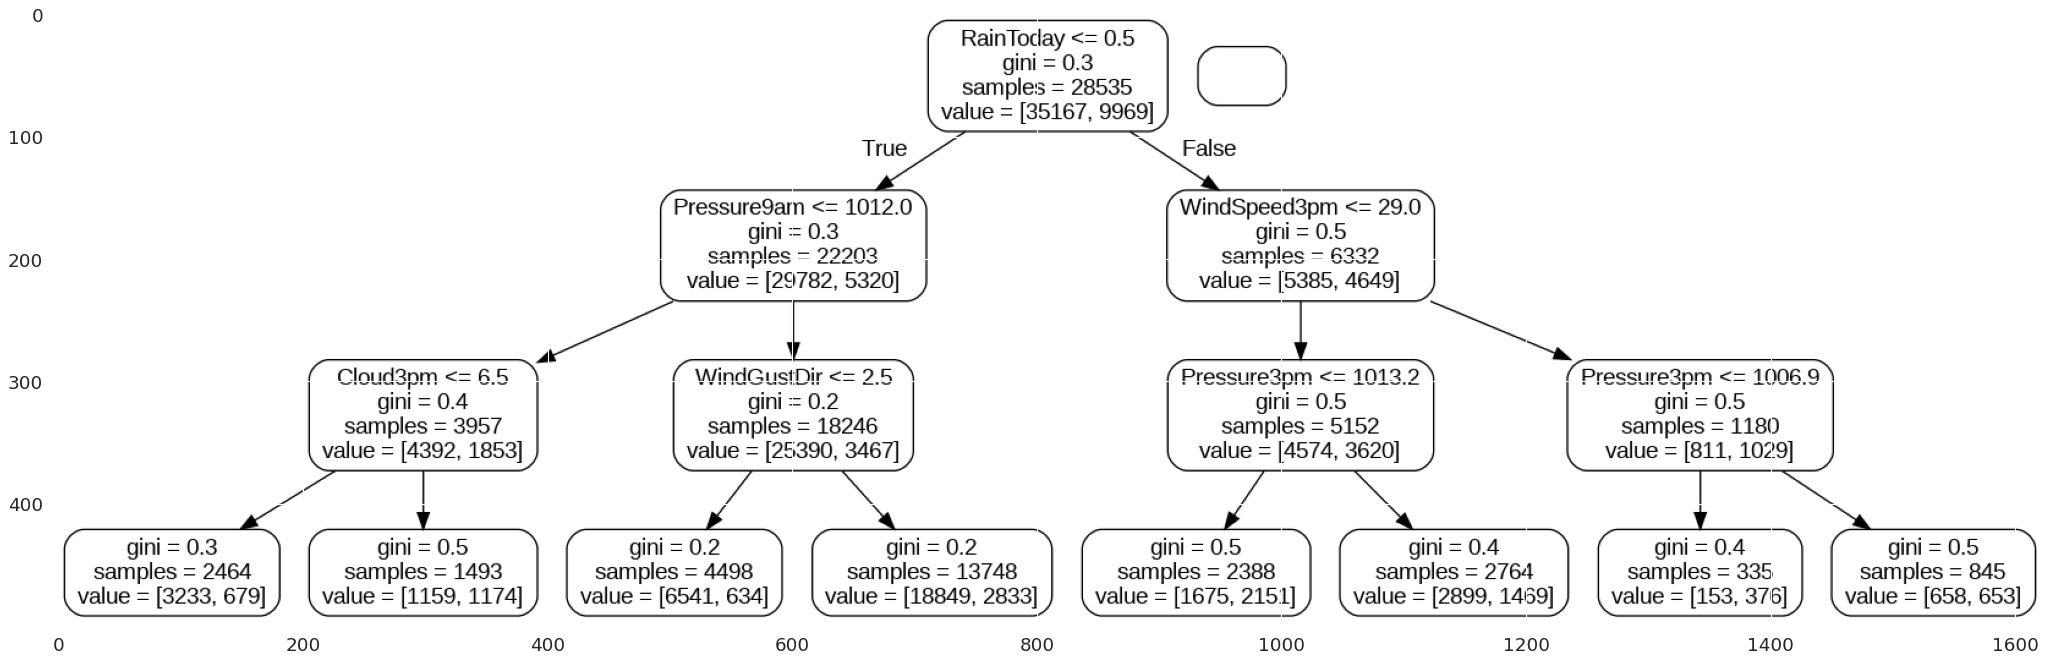

In [65]:
# Visualization of Nodes for the purpose of explainability
figure(figsize=(32, 24), dpi=80)
tree = tree_model.estimators_[0]
export_graphviz(
    tree,
    out_file="tree.dot",
    feature_names=list(x_train.columns),
    rounded=True,
    precision=1,
)
(graph,) = pydot.graph_from_dot_file("tree.dot")
graph.write_png("tree.png")
img = mpimg.imread("tree.png")
imgplot = plt.imshow(img)
plt.show()

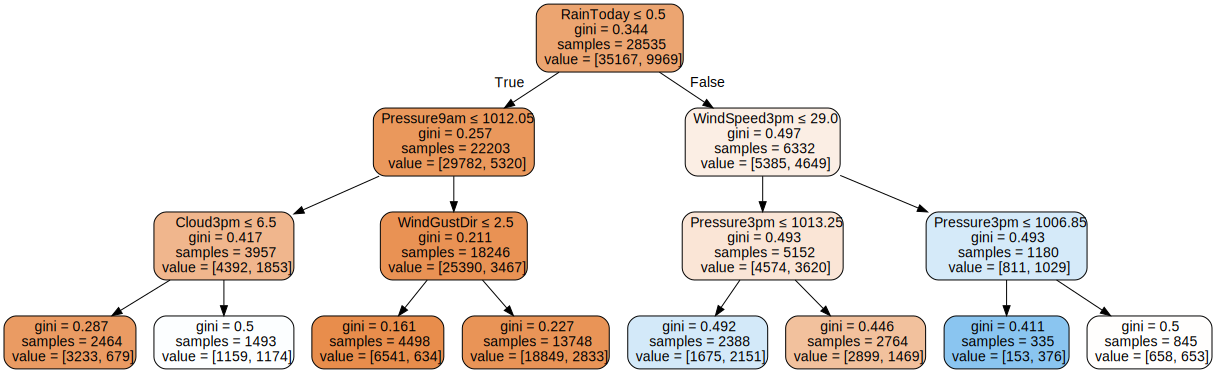

In [66]:
tree = tree_model.estimators_[0]
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=list(x_train.columns),
                           filled=True, rounded=True, special_characters=True)
graph = Source(dot_data)
graph.format = 'png'
graph.render('tree',view=True)

display(graph)

The tree model starts by checking the number of samples. If the number of samples is greater than or equal to 28535, then the flowchart goes to the next step. This suggests that the number of samples is an important feature for the classification problem.

The next step in the flowchart is to check the gini value. If the gini value is greater than or equal to 0.3, then the flowchart goes to the next step. This suggests that the gini value is also an important feature for the classification problem.

The flowchart then checks the pressure at 9am and the wind gust direction at 9am. If the pressure at 9am is less than or equal to 1012.0 and the wind gust direction at 9am is less than or equal to 7.5, then the flowchart goes to the next step. This suggests that the pressure at 9am and the wind gust direction at 9am are important features for the classification problem, but only if the gini value is greater than or equal to 0.3.

The flowchart then checks the cloud cover at 3pm, the wind gust direction at 3pm, and the pressure at 3pm. These features are only checked if the pressure at 9am is less than or equal to 1012.0 and the wind gust direction at 9am is less than or equal to 7.5. This suggests that these features are less important for the classification problem than the number of samples, the gini value, the pressure at 9am, and the wind gust direction at 9am.

Overall, the flowchart suggests that the following features are important for the classification problem:

Pressure at 9am

Wind gust direction at 9am

Cloud cover at 3pm

Wind gust direction at 3pm

Pressure at 3pm

In [67]:
# Get numerical feature importances
tree_importances = list(tree_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [
    (feature, round(importance, 2))
    for feature, importance in zip(x_train.columns, tree_importances)
]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

In [68]:
# Print out the feature and importances
[print("Variable: {:10} Importance: {}".format(*pair)) for pair in feature_importances];

Variable: Cloud3pm   Importance: 0.32
Variable: Rainfall   Importance: 0.13
Variable: RainToday  Importance: 0.11
Variable: Humidity3pm Importance: 0.1
Variable: Cloud9am   Importance: 0.08
Variable: Pressure9am Importance: 0.06
Variable: Sunshine   Importance: 0.05
Variable: WindGustSpeed Importance: 0.05
Variable: Pressure3pm Importance: 0.05
Variable: Humidity9am Importance: 0.03
Variable: MinTemp    Importance: 0.01
Variable: Temp9am    Importance: 0.01
Variable: Location   Importance: 0.0
Variable: MaxTemp    Importance: 0.0
Variable: Evaporation Importance: 0.0
Variable: WindGustDir Importance: 0.0
Variable: WindDir9am Importance: 0.0
Variable: WindDir3pm Importance: 0.0
Variable: WindSpeed9am Importance: 0.0
Variable: WindSpeed3pm Importance: 0.0
Variable: Temp3pm    Importance: 0.0
Variable: Year       Importance: 0.0
Variable: Month      Importance: 0.0
Variable: Day        Importance: 0.0


###H20 AutoML

In [69]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,27 mins 27 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_b7v74h
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.015 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [70]:
data_h2o = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


#### Describe statistical properties and types

In [71]:
data_h2o.describe()

Rows:56420
Cols:25

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
type,enum,real,real,real,real,real,enum,int,enum,enum,int,int,int,int,real,real,int,int,real,real,enum,enum,int,int,int
mins,,-6.7,4.1,0.0,0.0,0.0,,9.0,,,2.0,2.0,0.0,0.0,980.5,977.1,0.0,0.0,-0.7,3.7,,,2007.0,1.0,1.0
mean,,13.464769585253466,24.219205955335035,2.130397022332514,5.503135412974104,7.735625664657944,,40.877366182204796,,,15.667227933357081,19.786777738390814,65.87412265154222,49.60198511166233,1017.2395054945057,1014.7955795817124,4.241705069124422,4.326515420063828,18.204961006735356,22.710333215171925,,,2012.221074087199,6.425008862105626,15.723909961006727
maxs,,31.4,48.1,206.2,81.2,14.5,,124.0,,,67.0,76.0,100.0,100.0,1040.4,1038.9,8.0,9.0,39.4,46.1,,,2017.0,12.0,31.0
sigma,,6.4166887885306885,6.970676387108936,7.014822227998487,3.696282270131763,3.7581533156636526,,13.335231529564288,,,8.317004845694358,8.510180486546123,18.513289228936415,20.197039882861784,6.909356785644347,6.870891684997932,2.7971623467492948,2.647251291176374,6.56799122133222,6.836543115226247,,,2.45097825424432,3.451383173302762,8.782527002129015
zeros,,27,0,36709,128,1658,,0,,,0,0,1,3,0,0,5262,3470,1,0,,,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,2009.0,1.0,1.0
1,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,2009.0,1.0,2.0
2,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,2009.0,1.0,4.0


In [72]:
data_h2o.types

{'Location': 'enum',
 'MinTemp': 'real',
 'MaxTemp': 'real',
 'Rainfall': 'real',
 'Evaporation': 'real',
 'Sunshine': 'real',
 'WindGustDir': 'enum',
 'WindGustSpeed': 'int',
 'WindDir9am': 'enum',
 'WindDir3pm': 'enum',
 'WindSpeed9am': 'int',
 'WindSpeed3pm': 'int',
 'Humidity9am': 'int',
 'Humidity3pm': 'int',
 'Pressure9am': 'real',
 'Pressure3pm': 'real',
 'Cloud9am': 'int',
 'Cloud3pm': 'int',
 'Temp9am': 'real',
 'Temp3pm': 'real',
 'RainToday': 'enum',
 'RainTomorrow': 'enum',
 'Year': 'int',
 'Month': 'int',
 'Day': 'int'}

In [74]:
data_h2o['RainTomorrow'] = data_h2o['RainTomorrow'].asfactor()

Here, "RainTomorrow" column in H2O data frame is converted to a categorical or factor variable for binary classification, which is common in tasks where we can predict whether it will rain tomorrow or not.

In [75]:
data_h2o['RainTomorrow'].unique()

C1
No
Yes


#### Split dataframe to train and test

Splitting the dataframe in train and test data with 80:20 ratio.

In [76]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = data_h2o.split_frame([pct_rows])

In [77]:
#Check the shape of train and test data
print(df_train.shape)
print(df_test.shape)

(45154, 25)
(11266, 25)


In [78]:
#Display all columns in X
X=data_h2o.columns
print(X)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day']


#### Seperate Dependent variable from Independent variable

In [79]:
#Seperate Dependent variable from Independent variable
y_numeric ='RainTomorrow'
X.remove(y_numeric)
print(X)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'Year', 'Month', 'Day']


In [80]:
#set the AutoML
aml = H2OAutoML(max_runtime_secs=600, stopping_metric="AUC", max_models=10, seed=1, nfolds=4)

#pass the data through H20AutoML
aml.train(x=X,y=y_numeric,training_frame=df_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),9/10
# GBM base models (used / total),3/4
# XGBoost base models (used / total),3/3
# DRF base models (used / total),2/2
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,4
Metalearner fold_column,None


The model key for this stacked ensemble is "StackedEnsemble_AllModels_1_AutoML_3_20231102_234311". Below is a summary of the key information and performance metrics:

*   Model Type: StackedEnsemble

    Model Key: StackedEnsemble_AllModels_1_AutoML_3_20231102_234311


*   **ModelMetricsBinomialGLM on Train Data**:
    
    Mean Squared Error (MSE): 0.0544

    Root Mean Squared Error (RMSE): 0.2332
    
    Log Loss: 0.1924
    
    Area Under the Receiver Operating Characteristic Curve (AUC): 0.9766

    Area Under the Precision-Recall Curve (AUCPR): 0.9352


*   **Confusion Matrix on Train Data:**

    True Negatives (TN): 7402

    False Positives (FP): 359

    False Negatives (FN): 299

    True Positives (TP): 1909


*   **ModelMetricsBinomialGLM on Cross-Validation Data:**

    Mean Squared Error (MSE): 0.0955

    Root Mean Squared Error (RMSE): 0.3091

    Log Loss: 0.3069

    Area Under the Receiver Operating Characteristic Curve (AUC): 0.9054

    Area Under the Precision-Recall Curve (AUCPR): 0.7678


This stacked ensemble model demonstrates strong predictive performance on both the training and cross-validation datasets, as indicated by high AUC and AUCPR values. The model combines predictions from a variety of base models, effectively utilizing their diverse strengths to improve overall performance.

#### Display Leaderboard

In [81]:
lb = aml.leaderboard
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_2_20240317_223934,0.907057,0.303314,0.769964,0.191331,0.307166,0.0943512
StackedEnsemble_BestOfFamily_1_AutoML_2_20240317_223934,0.904857,0.306682,0.764804,0.196662,0.309067,0.0955225
GBM_1_AutoML_2_20240317_223934,0.901492,0.31269,0.758627,0.202452,0.311636,0.0971172
GBM_3_AutoML_2_20240317_223934,0.900726,0.314211,0.756374,0.198727,0.312083,0.097396
GBM_2_AutoML_2_20240317_223934,0.899872,0.315493,0.754847,0.19594,0.312349,0.0975617
XGBoost_3_AutoML_2_20240317_223934,0.899465,0.314186,0.753287,0.196296,0.312903,0.097908
GBM_4_AutoML_2_20240317_223934,0.898865,0.317074,0.753106,0.205841,0.313819,0.0984827
DRF_1_AutoML_2_20240317_223934,0.897166,0.345869,0.750689,0.200814,0.314514,0.0989189
XGBoost_2_AutoML_2_20240317_223934,0.895758,0.322654,0.744382,0.205414,0.316866,0.100404
XGBoost_1_AutoML_2_20240317_223934,0.894599,0.324878,0.742789,0.199532,0.318125,0.101204


The top-performing model is the "StackedEnsemble_AllModels_1," which achieved the highest AUC (Area Under the ROC Curve) of 0.9054. AUC is a measure of a model's ability to distinguish between positive and negative classes, with higher values indicating better performance.

AUC-PR: The "StackedEnsemble_AllModels_1" model also has the highest AUC-PR (Area Under the Precision-Recall Curve) of 0.7678. AUC-PR measures a model's precision and recall performance, particularly important when dealing with imbalanced datasets.

In this leaderboard, the best performing model is:
The "StackedEnsemble_AllModels_1" outperforms other

1.   StackedEnsemble_AllModels_1
2.   StackedEnsemble_BestOfFamily_1


In summary, the "StackedEnsemble_AllModels_1" appears to be the best model for the binary classification task of predicting whether it will rain tomorrow, based on the provided performance metrics.

In [82]:
lb = h2o.automl.get_leaderboard(aml, extra_columns="ALL")
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_2_20240317_223934,0.907057,0.303314,0.769964,0.191331,0.307166,0.0943512,29350,0.242809,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_2_20240317_223934,0.904857,0.306682,0.764804,0.196662,0.309067,0.0955225,26480,0.143612,StackedEnsemble
GBM_1_AutoML_2_20240317_223934,0.901492,0.31269,0.758627,0.202452,0.311636,0.0971172,8704,0.024396,GBM
GBM_3_AutoML_2_20240317_223934,0.900726,0.314211,0.756374,0.198727,0.312083,0.097396,6380,0.019225,GBM
GBM_2_AutoML_2_20240317_223934,0.899872,0.315493,0.754847,0.19594,0.312349,0.0975617,5732,0.017341,GBM
XGBoost_3_AutoML_2_20240317_223934,0.899465,0.314186,0.753287,0.196296,0.312903,0.097908,4465,0.003302,XGBoost
GBM_4_AutoML_2_20240317_223934,0.898865,0.317074,0.753106,0.205841,0.313819,0.0984827,8224,0.024106,GBM
DRF_1_AutoML_2_20240317_223934,0.897166,0.345869,0.750689,0.200814,0.314514,0.0989189,17319,0.067076,DRF
XGBoost_2_AutoML_2_20240317_223934,0.895758,0.322654,0.744382,0.205414,0.316866,0.100404,5756,0.008498,XGBoost
XGBoost_1_AutoML_2_20240317_223934,0.894599,0.324878,0.742789,0.199532,0.318125,0.101204,6974,0.007141,XGBoost


####Compare Models

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_2_20240317_223934,0.907057,0.303314,0.769964,0.191331,0.307166,0.0943512,29350,0.242809,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_2_20240317_223934,0.904857,0.306682,0.764804,0.196662,0.309067,0.0955225,26480,0.143612,StackedEnsemble
GBM_1_AutoML_2_20240317_223934,0.901492,0.31269,0.758627,0.202452,0.311636,0.0971172,8704,0.024396,GBM
GBM_3_AutoML_2_20240317_223934,0.900726,0.314211,0.756374,0.198727,0.312083,0.097396,6380,0.019225,GBM
GBM_2_AutoML_2_20240317_223934,0.899872,0.315493,0.754847,0.19594,0.312349,0.0975617,5732,0.017341,GBM
XGBoost_3_AutoML_2_20240317_223934,0.899465,0.314186,0.753287,0.196296,0.312903,0.097908,4465,0.003302,XGBoost
GLM_1_AutoML_2_20240317_223934,0.891062,0.326659,0.732752,0.208083,0.319177,0.101874,4043,0.002797,GLM


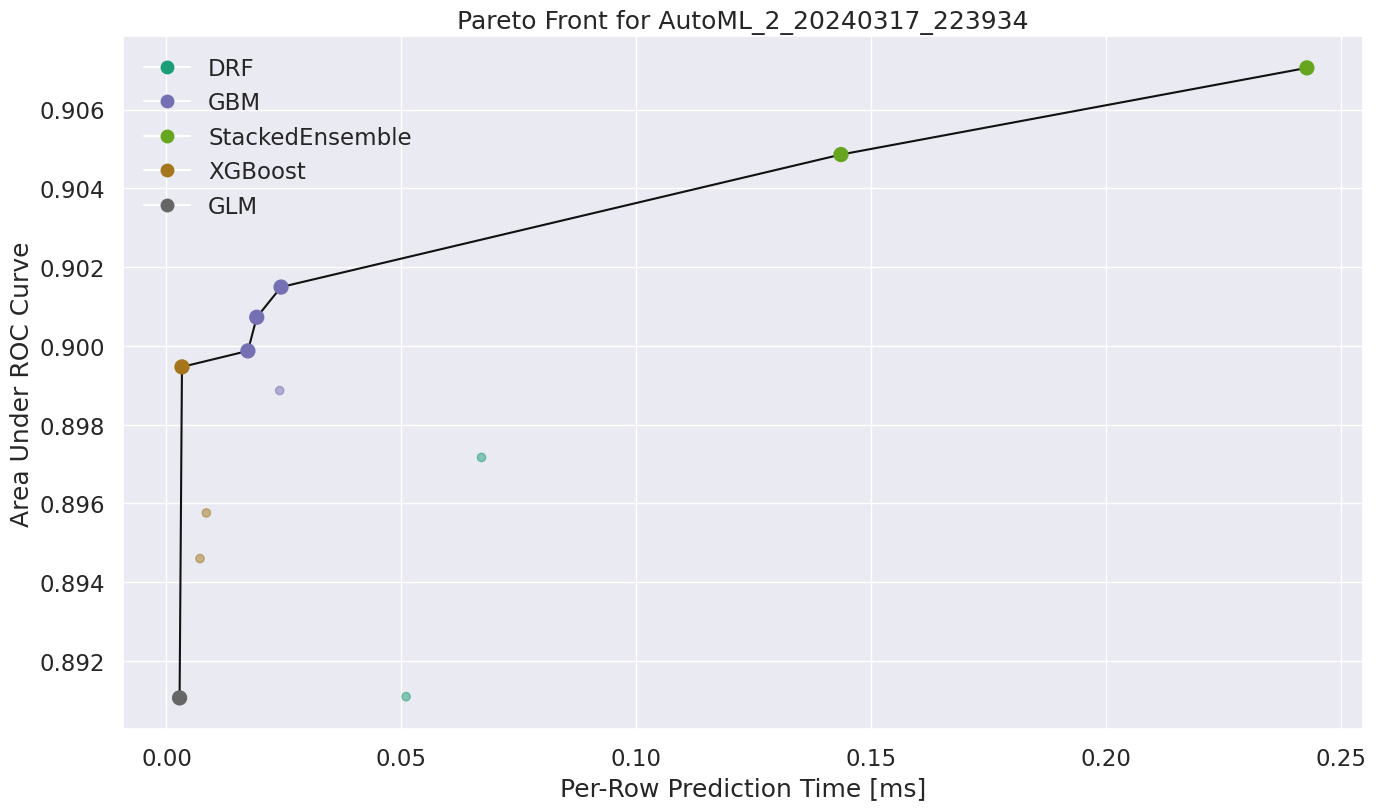

In [84]:
pf = aml.pareto_front()
pf.figure()
pf

The Stacked Ensemble model shows the highest AUC (0.9055) and AUC-PR (0.7673), indicating excellent predictive performance. It also has the lowest log loss (0.3053) and Mean Squared Error (MSE) of 0.0949.

The Gradient Boosting Machine (GBM) and XGBoost models also perform well, with competitive AUC values (0.8997 and 0.8980, respectively).

The Stacked Ensemble has the lowest mean per class error (0.1929), indicating that it provides balanced and accurate predictions across different classes.

The prediction time per row is fastest for XGBoost (0.0019 ms per row), making it efficient for real-time or large-scale prediction tasks. GLM is also quite efficient in terms of prediction time.

GBM and XGBoost offer a good balance between predictive accuracy and efficiency, making them practical choices for many real-world scenarios.

In [85]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

{'StackedEnsemble_AllModels_1_AutoML_2_20240317_223934': 0,
 'StackedEnsemble_BestOfFamily_1_AutoML_2_20240317_223934': 1,
 'GBM_1_AutoML_2_20240317_223934': 2,
 'GLM_1_AutoML_2_20240317_223934': 11}

In [86]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

2


In [87]:
best_model.algo

'gbm'

In [88]:
best_model.train(x=X,y=y_numeric,training_frame=df_train)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1710713457310_2920


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          22237                  5            5            5             24            32            30.72

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0881344496726269
RMSE: 0.2968744678692105
LogLoss: 0.2895206137788276
Mean Per-Class Error: 0.18270479200429607
AUC: 0.9187479531126723
AUCPR: 0.803663153158362
Gini: 0.8374959062253446

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3536486702829532
       No     Yes    Error    Rate
-----  -----  -----  -------  ----------------
No     32157  3037   0.0863   (3037.0/35194.0)
Yes    2780   7180   0.2791   (2780.0/9960.0)
Total  34937  10217  0.1288   (5817.0/45154.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.353649     0.711701  201
max f2                       0.163186     0.779039  285
max f0point5                 0.596176     0.755211  120
max accuracy                 0.466396     0.878903  161
max precision                0.969742     1         0
max recall                   0.0171845    1         392
max specificity              0.969742     1         0
max absolute_mcc             0.410659     0.630437  180
max min_per_class_accuracy   0.22638      0.833381  253
max mean_per_class_accuracy  0.211767     0.834486  260
max tns                      0.969742     35194     0
max fns                      0.969742     9943      0
max fps                      0.0117242    35194     399
max tps                      0.0171845    9960      392
max tnr                      0.969742     1         0
max fnr                      0.969742     0.998293  0
max fpr                      0.0117242    1         399
max tpr                      0.0171845    1         392

Gains/Lift Table: Avg response rate: 22.06 %, avg score: 22.08 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100102                   0.941849           4.53353     4.53353            1                0.953156   1                           0.953156            0.0453815       0.0453815                  353.353   353.353            0.0453815
2        0.0200204                   0.922559           4.5235      4.52852            0.997788         0.931379   0.998894                    0.942268            0.0452811       0.0906627                  352.35    352.852            0.0906342
3        0.0300084                   0.901644           4.46317     4.50677            0.984479         0.912428   0.994096                    0.932336            0.0445783       0.135241                   346.317   350.677            0.135014
4        0.0400186                   0.87797            4.41317     4.48336            0.973451         0.890125   0.988932                    0.921777            0.0441767       0.179418                   341.317   348.336            0.178849
5        0.0500066                   0.852283           4.23197     4.43315            0.933481         0.865109   0.


True Positives (TP): 7262.0

True Negatives (TN): 31769.0

total number of predictions made (Total) :44978.0


Accuracy = (TP + TN) / Total
Accuracy = (7262.0 + 31769.0) / 44978.0

Calculating the accuracy value:

Accuracy = 39031.0 / 44978.0 ≈ 0.8674

So, the accuracy of the model with the above data is approximately 0.8674 or 86.74%. This means that the model correctly predicts the target variable in about **86.74%** of the cases on the training data.

####Examine Models

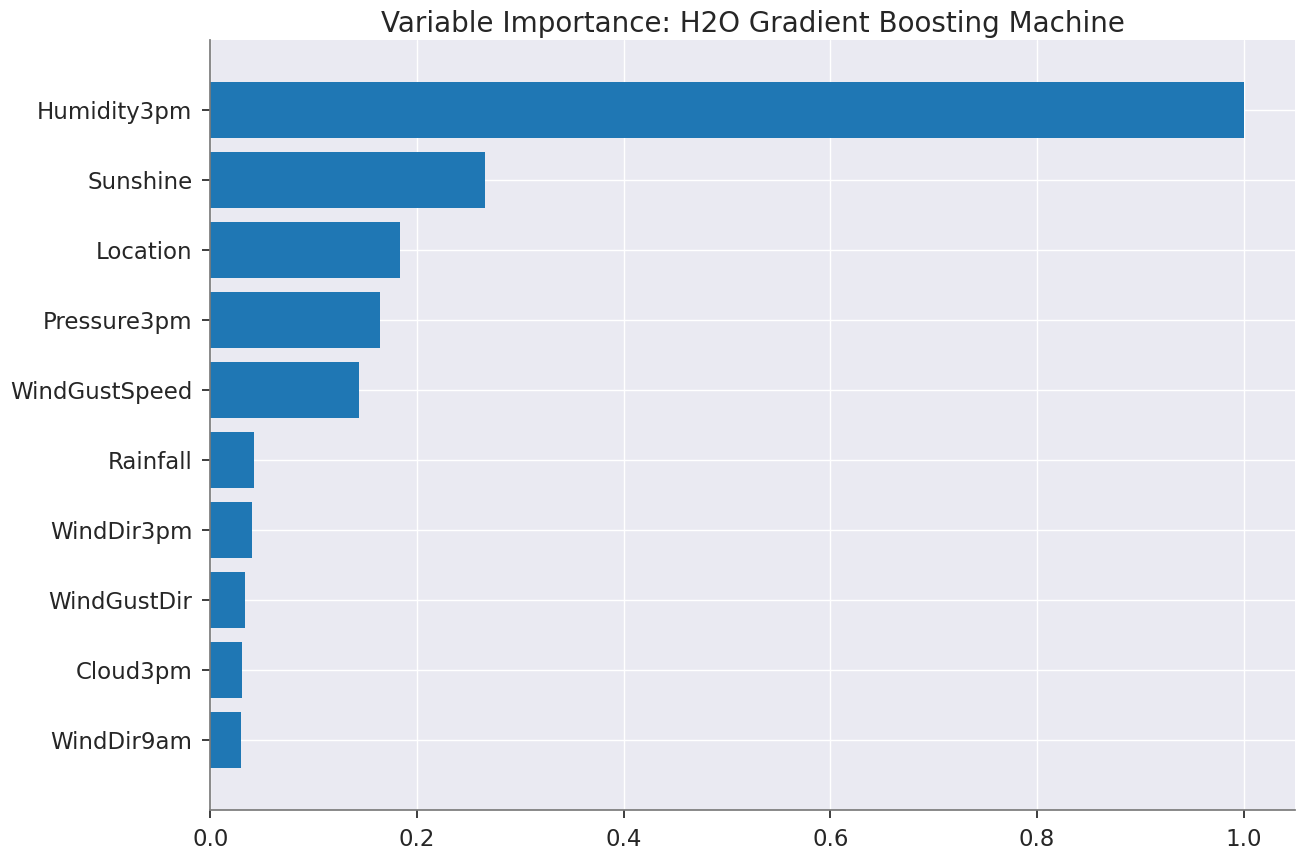

<Figure size 800x550 with 0 Axes>

In [89]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()


The variable importance analysis suggests that "Humidity3pm" is the most influential feature among all the variables, with an importance score of 1.0. This signifies that changes in "Humidity3pm" have a substantial impact on the model's predictions. Additionally, "Sunshine" and "Location" are identified as the next two significant variables contributing to the model's performance. These findings imply that these features play a crucial role in determining the model's predictive accuracy of 'RainTomorrrow'

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_2_20240317_223934,0.90178,0.309693,0.755164,0.198042,0.31051,0.0964166,29350,0.237384,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_2_20240317_223934,0.899135,0.313317,0.749706,0.204363,0.31248,0.0976436,26480,0.116415,StackedEnsemble
GBM_1_AutoML_2_20240317_223934,0.895315,0.320279,0.742409,0.203103,0.316047,0.0998859,8704,0.026035,GBM
XGBoost_3_AutoML_2_20240317_223934,0.894018,0.319298,0.743478,0.210401,0.315314,0.0994227,4465,0.004867,XGBoost
DRF_1_AutoML_2_20240317_223934,0.893942,0.345715,0.740414,0.207717,0.316127,0.0999364,17319,0.065844,DRF
GBM_3_AutoML_2_20240317_223934,0.893908,0.323068,0.738006,0.197491,0.317119,0.100565,6380,0.019503,GBM
GBM_4_AutoML_2_20240317_223934,0.893489,0.323063,0.741345,0.218419,0.317129,0.100571,8224,0.037311,GBM
GBM_2_AutoML_2_20240317_223934,0.893249,0.323564,0.739142,0.196203,0.317112,0.10056,5732,0.017542,GBM
XGBoost_2_AutoML_2_20240317_223934,0.890676,0.327537,0.733238,0.21436,0.319671,0.10219,5756,0.008762,XGBoost
XGBoost_1_AutoML_2_20240317_223934,0.890254,0.328981,0.733824,0.20043,0.319702,0.102209,6974,0.011285,XGBoost


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_2_20240317_223934

,No,Yes,Error,Rate
No,7889.0,910.0,0.1034,(910.0/8799.0)
Yes,722.0,1745.0,0.2927,(722.0/2467.0)
Total,8611.0,2655.0,0.1449,(1632.0/11266.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

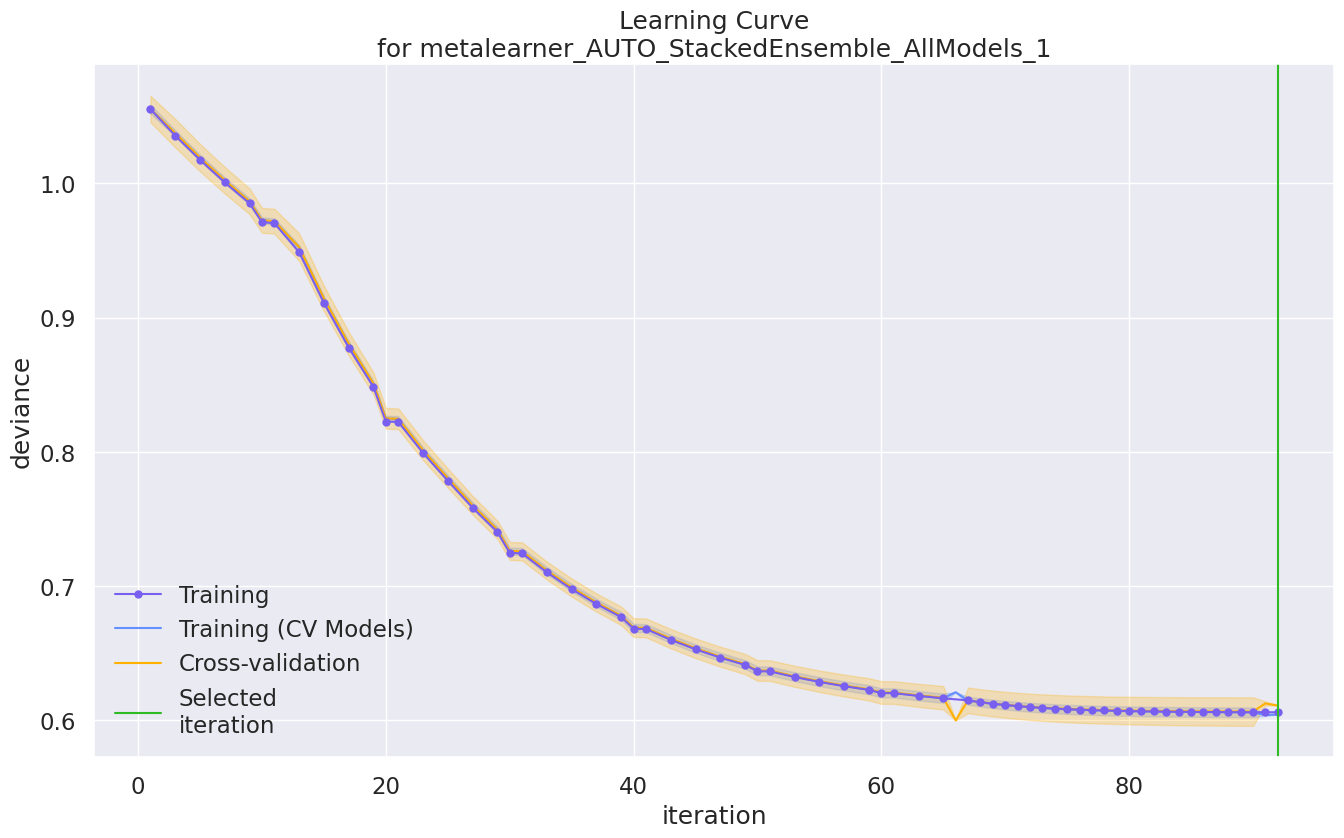

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

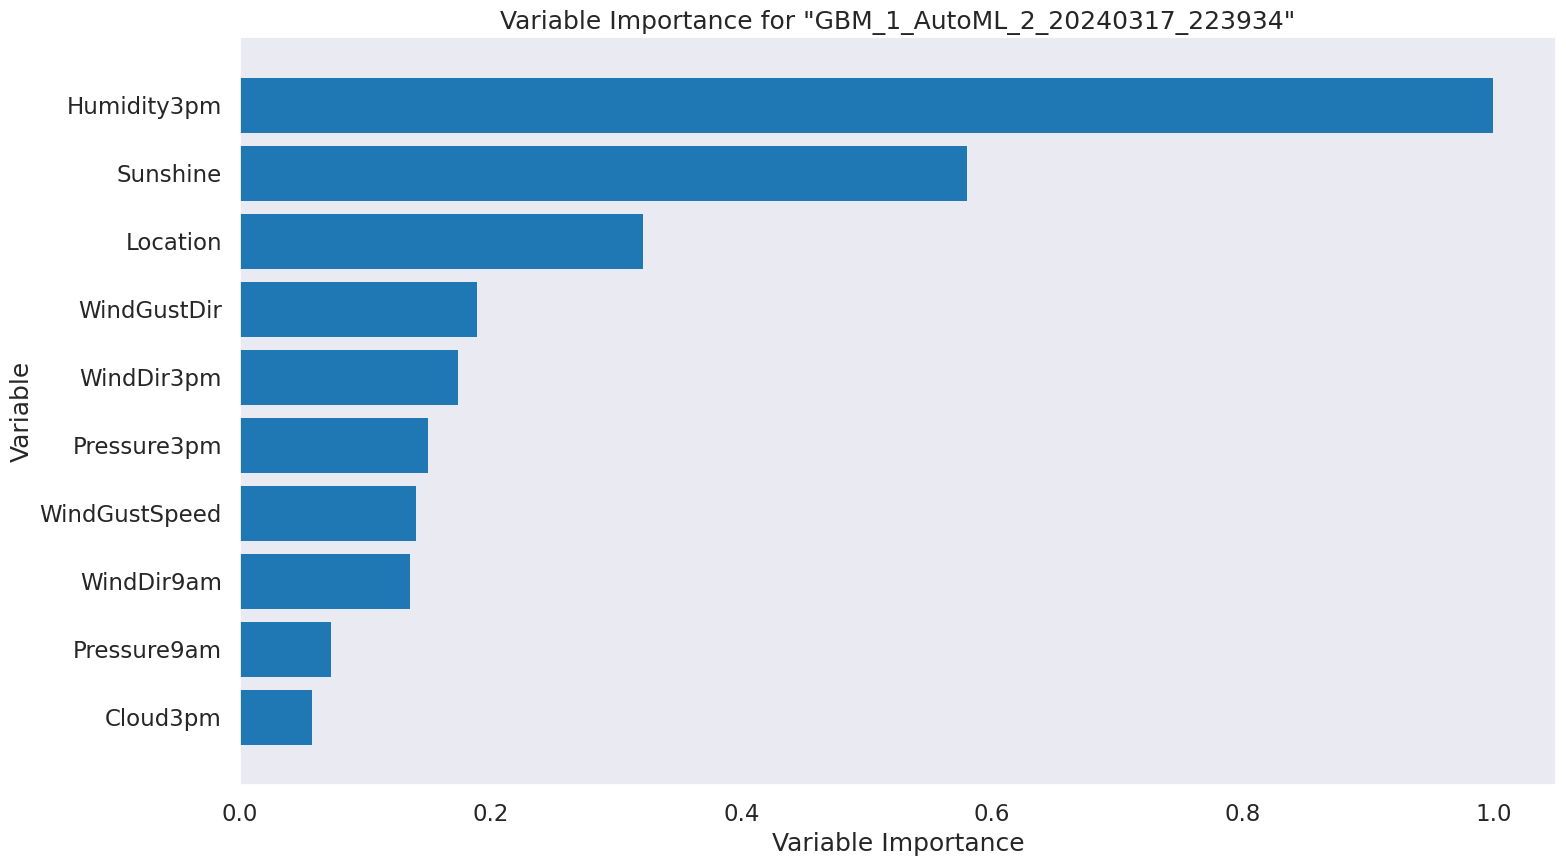

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

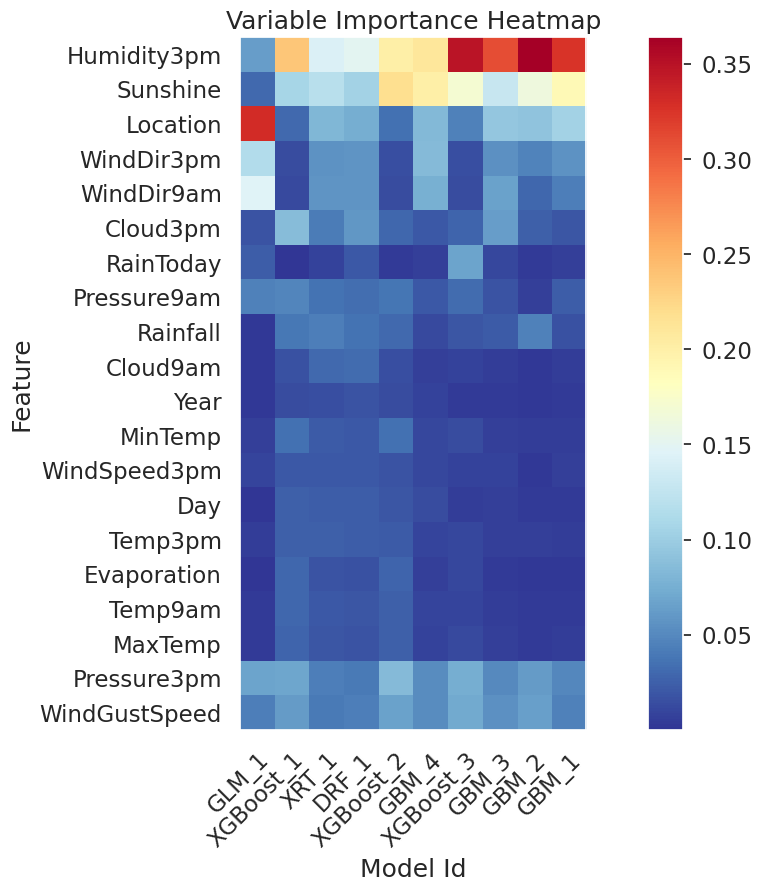

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

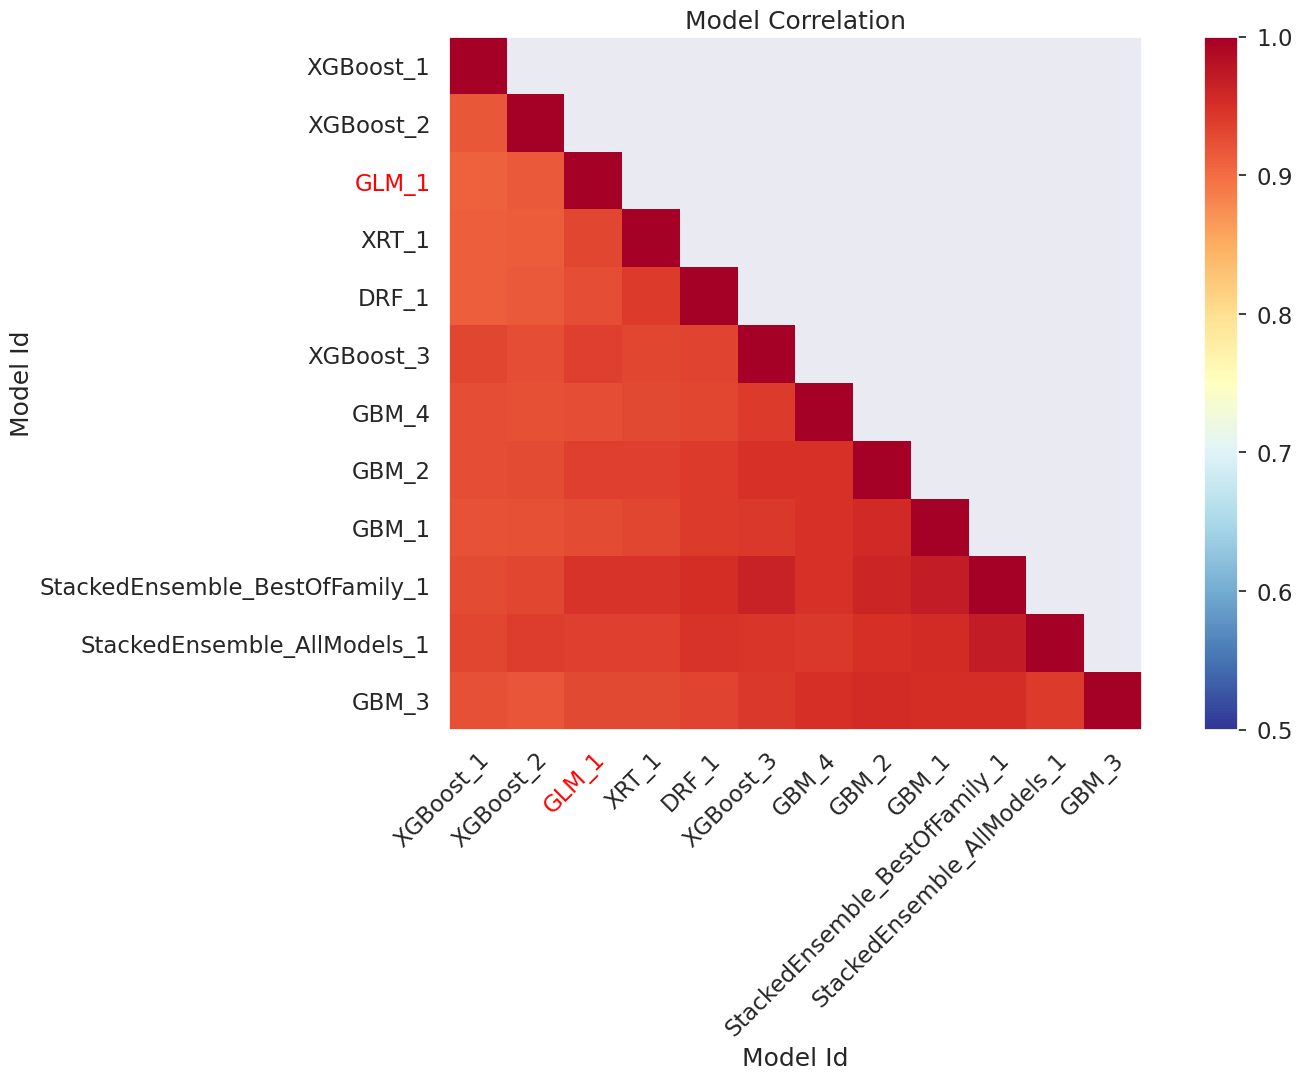

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

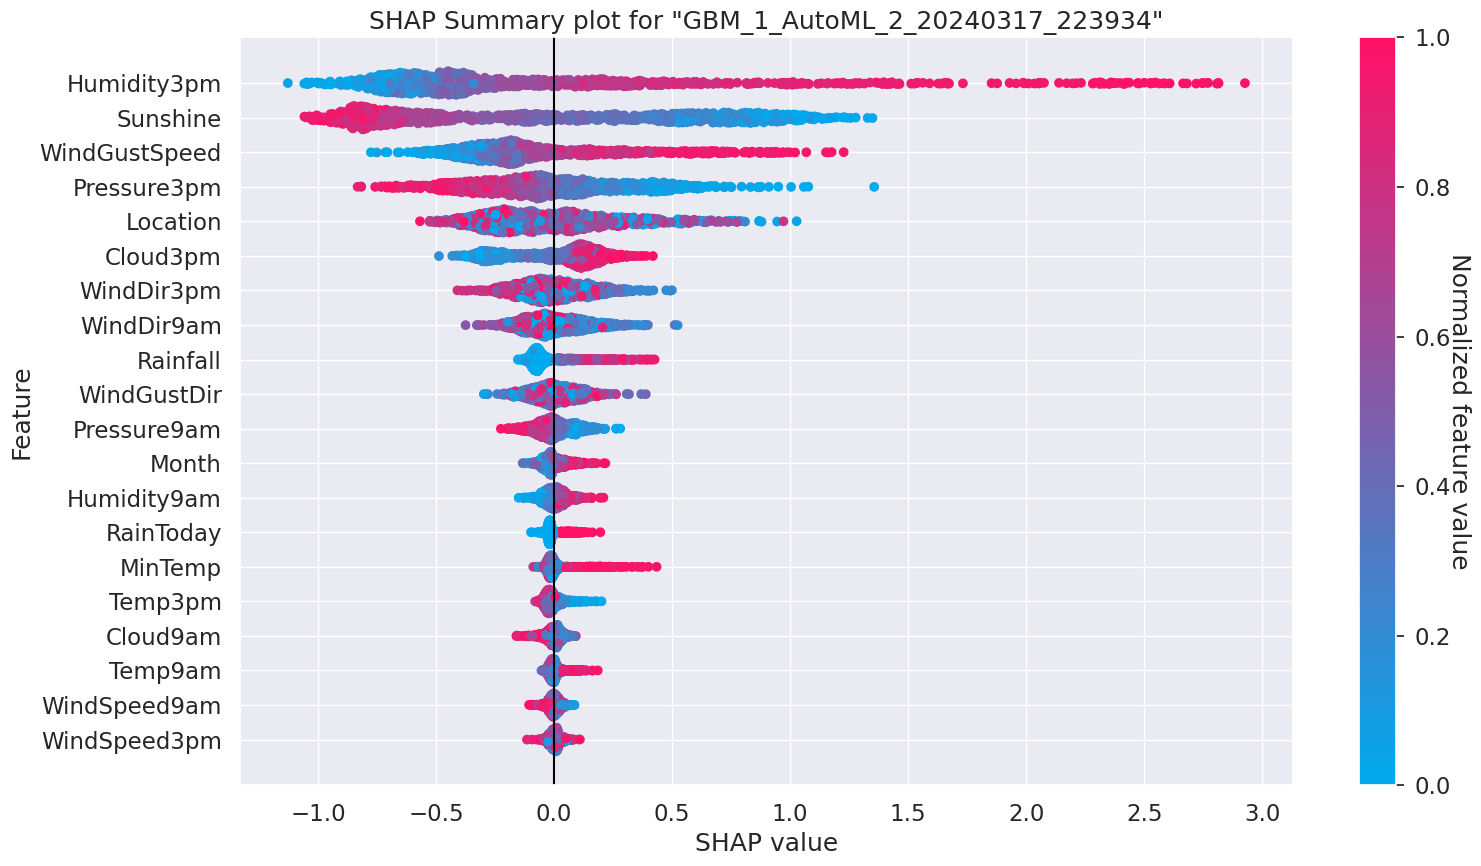

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

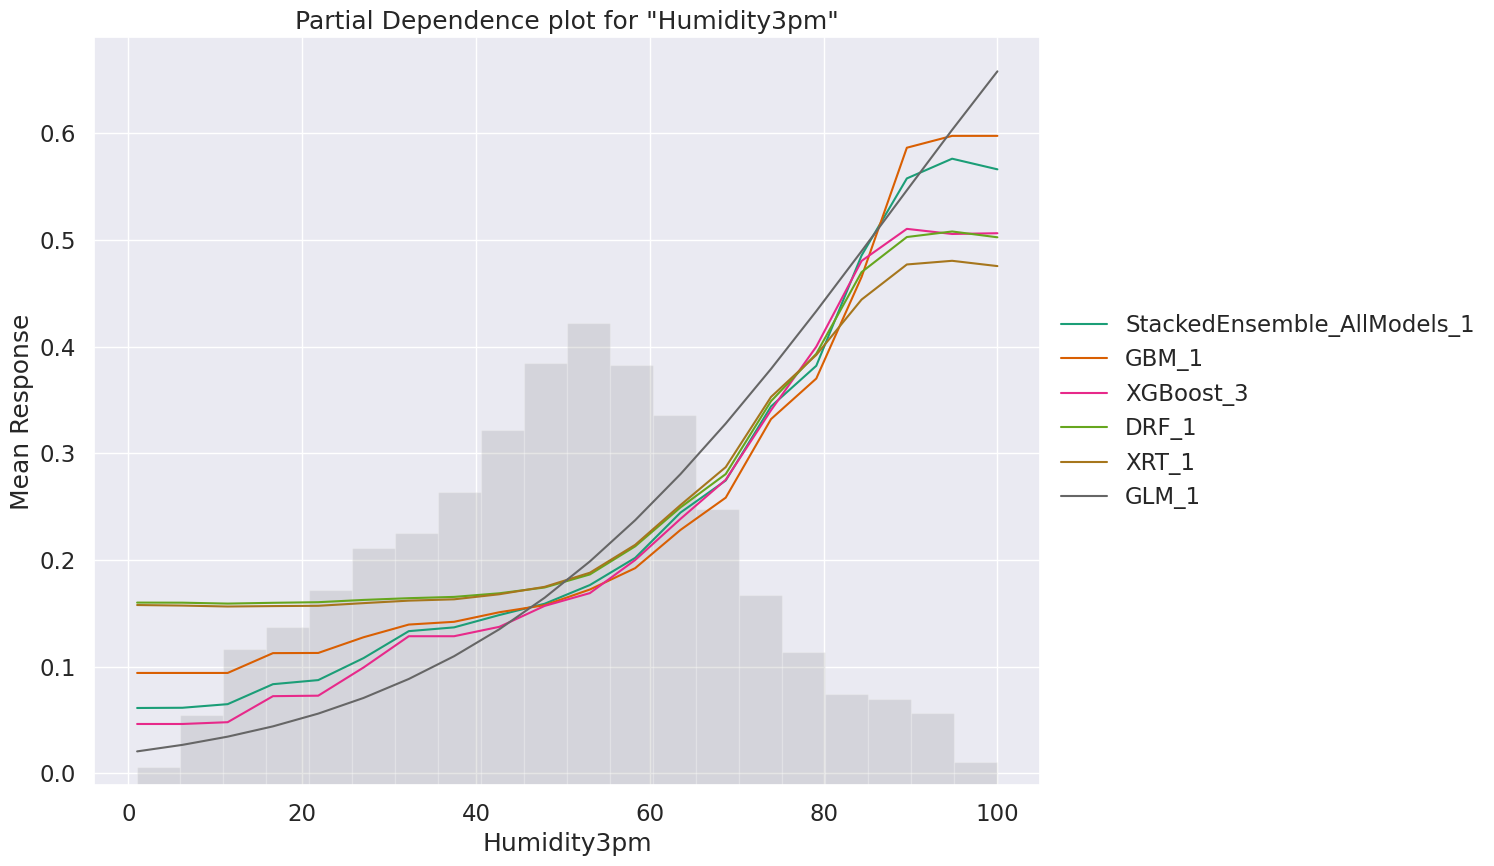

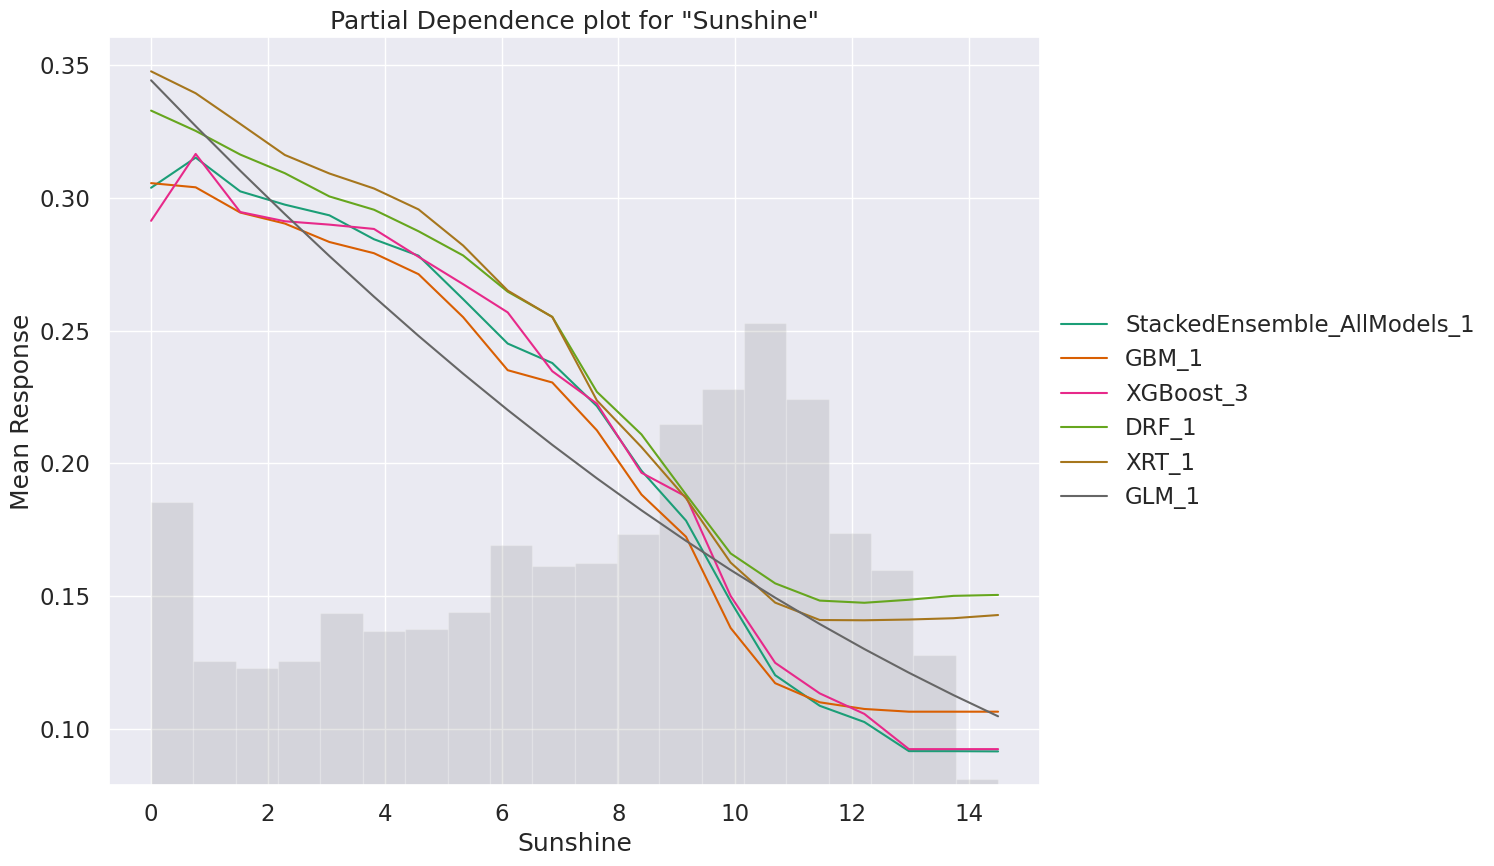

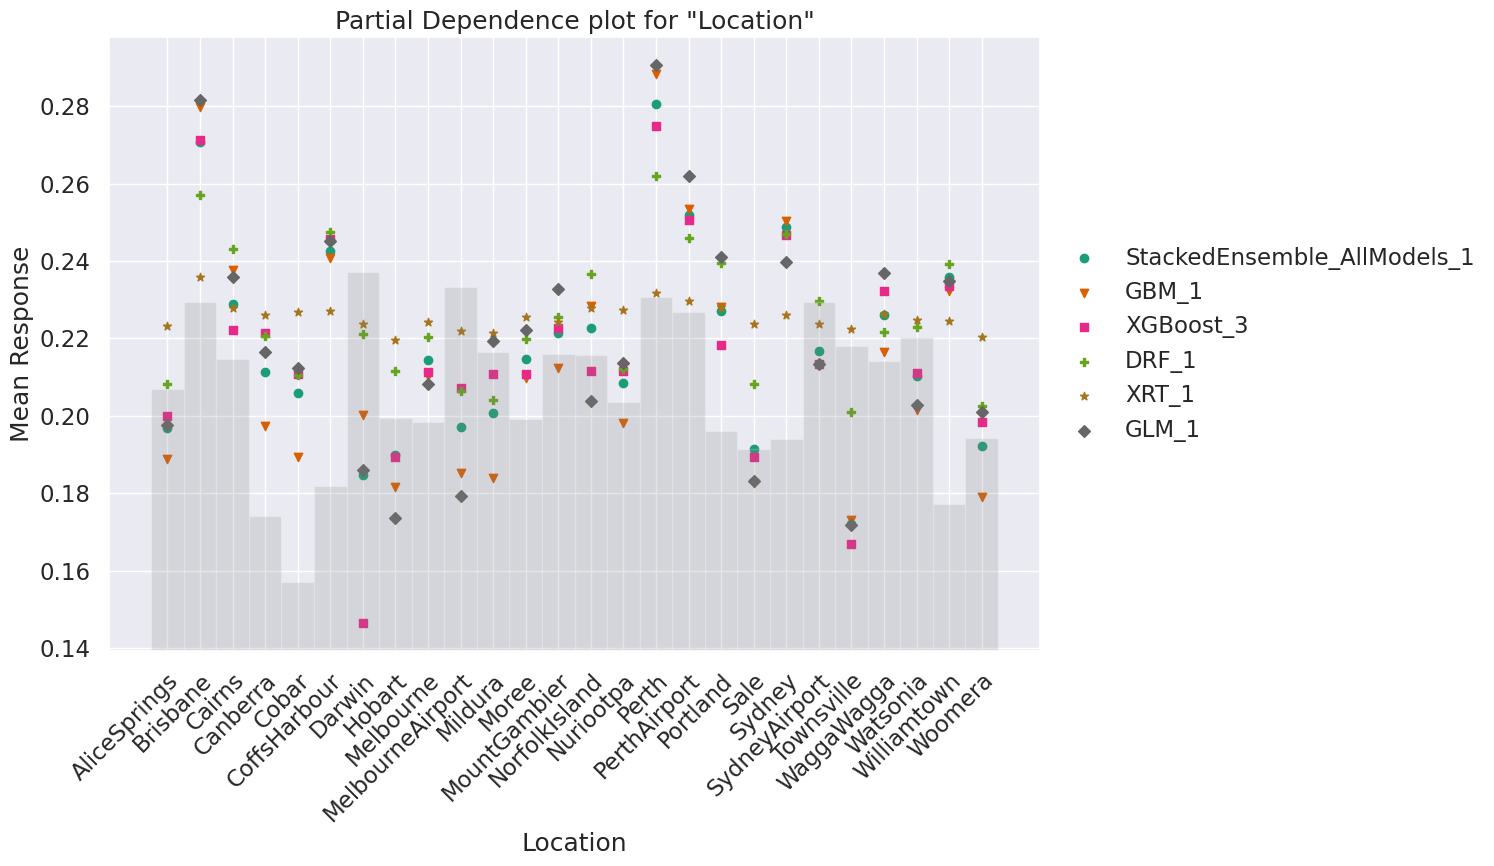

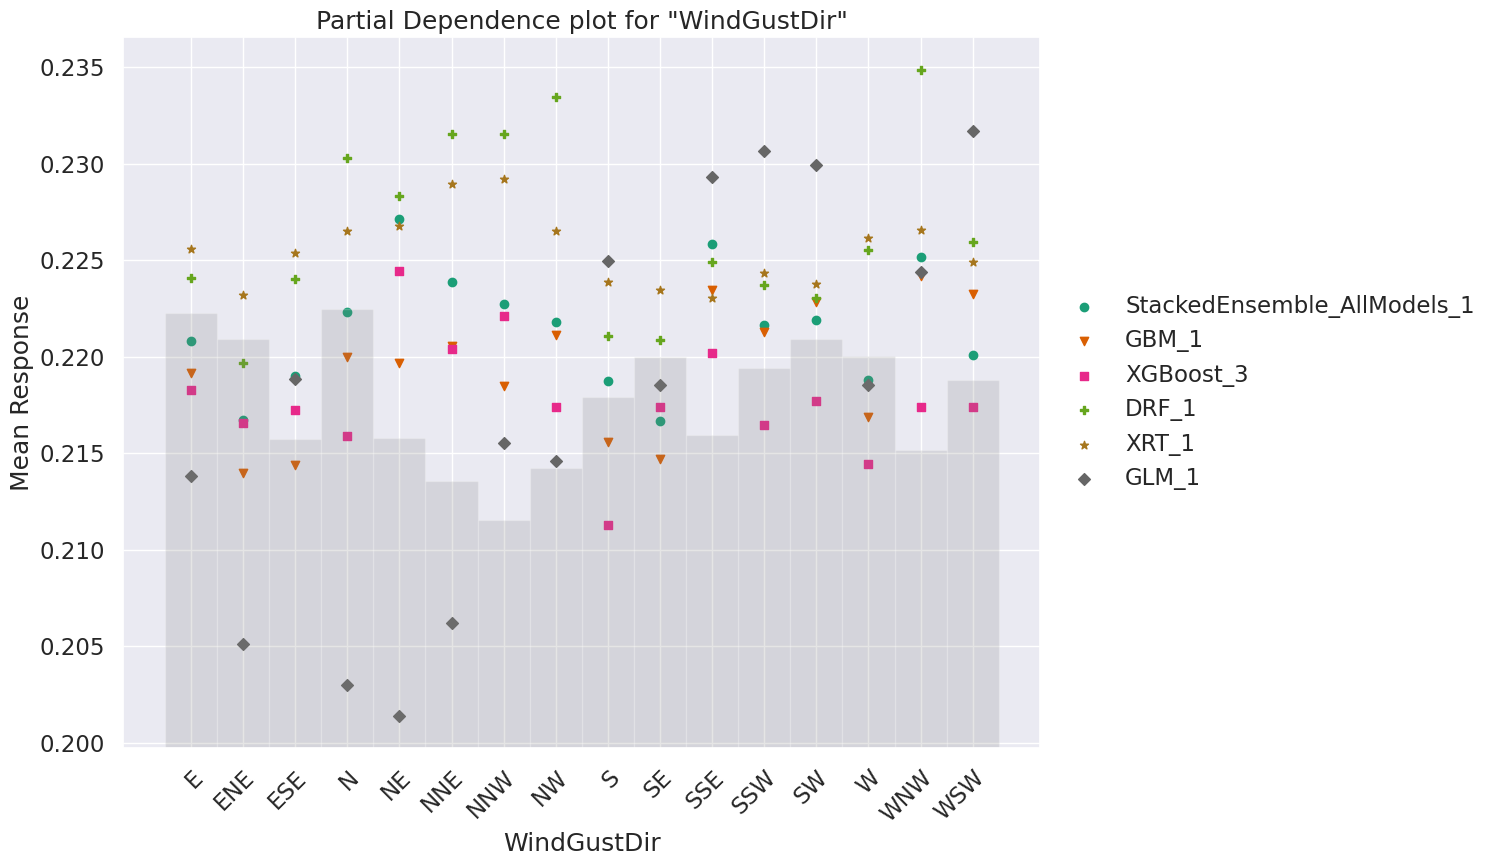

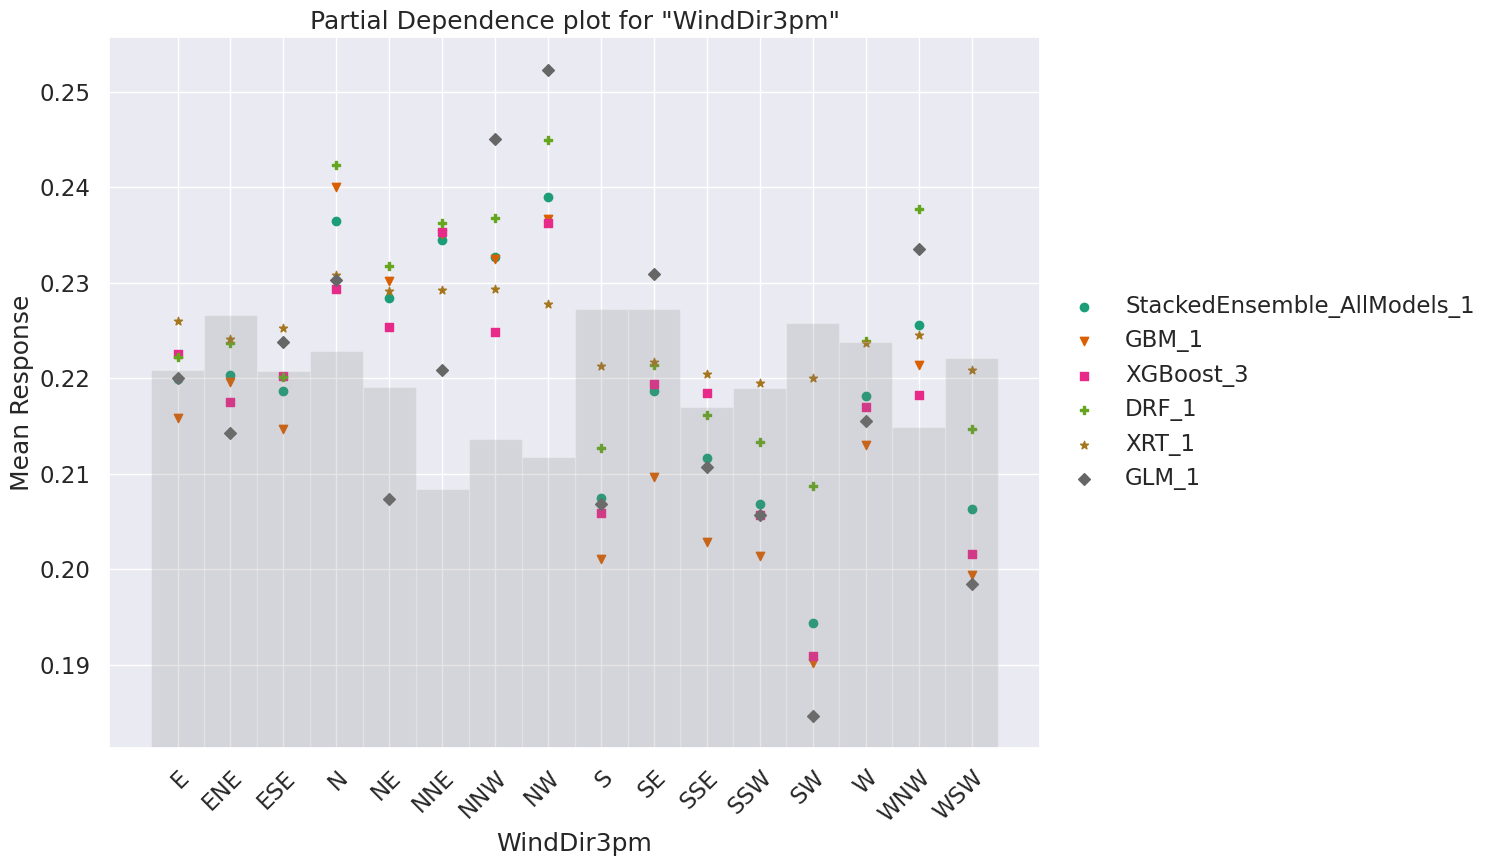

In [90]:
explain_model = aml.explain(frame = df_test)

In [91]:

import random
import shap
import matplotlib.pyplot as plt



# set seed for reproducibility
np.random.seed(123)

x_train_50 = shap.utils.sample(x_train, 50, random_state=123)
x_test_50 = shap.utils.sample(x_test, 50, random_state=123)

In [92]:
# generate samples
x_train_50 = shap.utils.sample(x_train, 50, random_state=123)
x_test_50 = shap.utils.sample(x_test, 50, random_state=123)


In [100]:
x_train_sample = shap.sample(x_train_50, 100)

# Creating the SHAP explainer with the sampled background data
rfe_explainer = shap.KernelExplainer(rfe.predict, x_train_sample, seed=1)

# Generating SHAP values for a similarly structured sample from your x_train data
# Ensure this sample is what you're interested in explaining
shap_values_sample = shap.sample(x_train, 100)  # Adjust as needed
rfe_shap_values = rfe_explainer.shap_values(shap_values_sample, nsamples=200)


  0%|          | 0/100 [00:00<?, ?it/s]

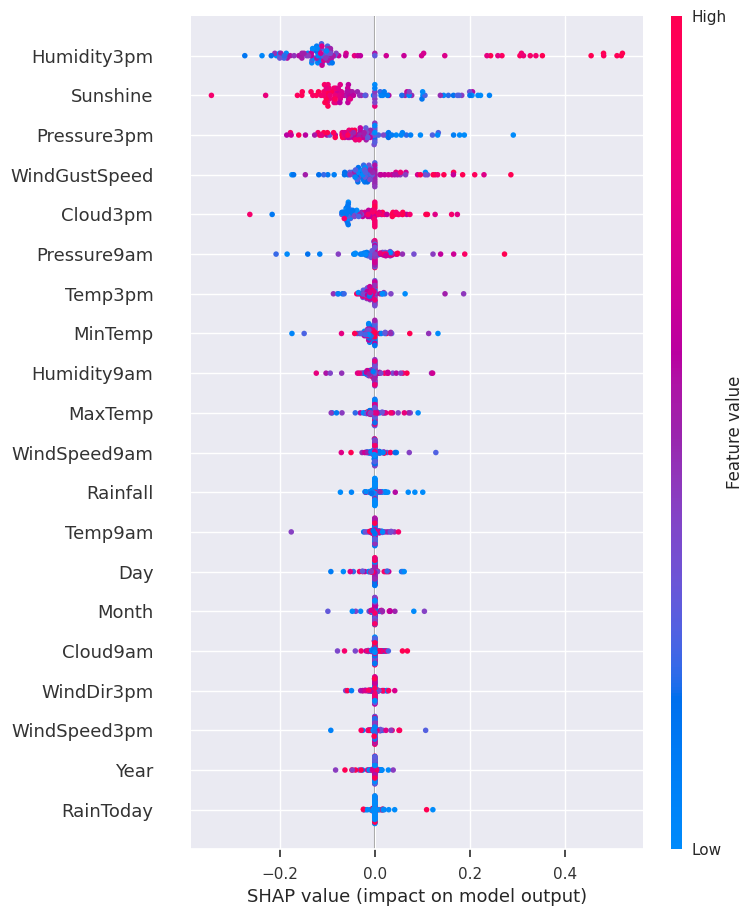

In [101]:
shap.summary_plot(rfe_shap_values, shap_values_sample)

The strongest correlation between wind speed and pressure is observed at high wind speeds. This suggests that the relationship between wind speed and pressure is non-linear and becomes stronger at higher wind speeds.

The plot shows a slight negative correlation between humidity and pressure at low wind speeds. This is likely due to the fact that high humidity can lead to cloud formation and precipitation, which can reduce pressure.

The plot also shows that there is a wider range of humidity values at higher wind speeds and pressures. This suggests that humidity is more variable at higher wind speeds and pressures.

Overall, the plot suggests that there is a positive correlation between wind speed and pressure, and that humidity is higher at higher wind speeds and pressures. The relationship between wind speed and pressure is non-linear and becomes stronger at higher wind speeds.

Humidity is also more variable at higher wind speeds and pressures.

##Copyright

Copyright (c) 2024 Sakshee Pawar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.